In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv(r"C:\Users\ralph\OneDrive\Desktop\jupyter\OOP\data\countries of the world.csv")

# Clean column names & country values
df.columns = df.columns.str.strip()
df['Country'] = df['Country'].astype(str).str.strip()

# Clean numeric data
for col in ['Population', 'Birthrate', 'Deathrate']:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(',', '', regex=False)
        .str.strip()
    )
    df[col] = pd.to_numeric(df[col], errors='coerce')


# Class Defenition

In [2]:
class CountryAnalysis:
    def __init__(self, df):
        self.df = df

    def show_country_analysis(self, country_input):
        country_input = country_input.strip().title()

        if country_input not in self.df['Country'].values:
            print(f"❌ Country '{country_input}' not found in dataset.")
            return

        # Extract data
        country_data = self.df[self.df['Country'] == country_input].iloc[0]
        population = country_data['Population'] / 1_000_000  # millions
        birthrate = country_data['Birthrate']
        deathrate = country_data['Deathrate']

        # Thresholds
        low_threshold = 200
        high_threshold = 1000

        # Create figure
        fig, ax1 = plt.subplots(figsize=(10, 6))
        ax2 = ax1.twinx()

        # Population bar
        ax2.bar('Population', population, color='lightgreen', alpha=0.7, width=0.3, label='Population (millions)')

        # Birthrate & Deathrate
        rate_names = ['Birthrate', 'Deathrate']
        rates = [birthrate, deathrate]
        colors = ['blue', 'red']

        ax1.plot(rate_names, rates, color='gray', linewidth=2, zorder=3)
        for i, (r, c) in enumerate(zip(rates, colors)):
            ax1.scatter(rate_names[i], r, s=100, color=c, edgecolor='black', zorder=4)
            ax1.text(rate_names[i], r + 0.5, f"{r:.1f}", ha='center', fontsize=9)

        # Threshold lines
        ax1.axhline(low_threshold, color='blue', linestyle='--', label=f'Low Threshold ({low_threshold})')
        ax1.axhline(high_threshold, color='red', linestyle='--', label=f'High Threshold ({high_threshold})')

        # Labels and title
        ax1.set_ylabel("Rate (per 1000 people)")
        ax2.set_ylabel("Population (millions)")
        ax1.set_ylim(0, max(high_threshold, birthrate, deathrate) * 1.3)
        ax1.set_title(f"{country_input}: Population, Birthrate & Deathrate", fontsize=12)
        ax1.grid(True, linestyle='--', alpha=0.5)

        # Legend
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

        plt.show()

        print(f"📊 {country_input}")
        print(f"Population: {population:.2f} million")
        print(f"Birthrate: {birthrate:.2f} per 1000")
        print(f"Deathrate: {deathrate:.2f} per 1000")


# Main Program

Enter a country:  Lebanon


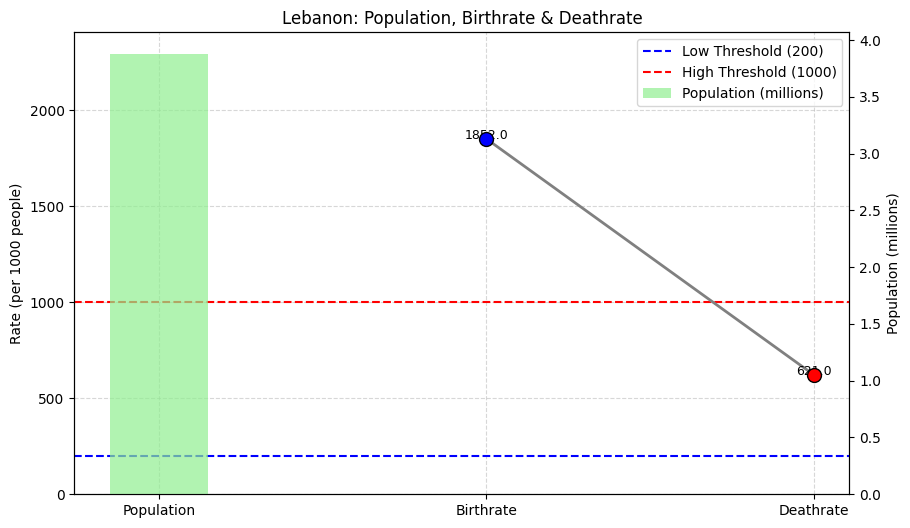

📊 Lebanon
Population: 3.87 million
Birthrate: 1852.00 per 1000
Deathrate: 621.00 per 1000


In [3]:
# Create analyzer object
analyzer = CountryAnalysis(df)

# Ask for user input
country_input = input("Enter a country: ")

# Show analysis
analyzer.show_country_analysis(country_input)
